<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI286 - Computación Científica II</h1>
    <h1> Tarea 2: How do planets move? </h1> 
    <h3> Víctor Torres Varas - 201173076-3</h3>
</center>
<p>
<center>Enero 2020 - v1.0 </center>
</p>

---

In [2]:
import numpy as np
import scipy as sp
from scipy import linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from scipy import constants as constantes

## Contexto

Ya que la fuerza que ejerce la masa del planeta Tierra hacia el Sol no se compara con la fuerza contraria, es posible modelar nuestra orbita sin tener en cuenta el Sol. Sin embargo existen casos en el que ambas masas son comparables, y en cuyo caso necesitamos analizar ambos cuerpos para poder modelar sus movimientos. Tal es el caso del sistema Alpha Centauri [1], en el cual tres estrellas ejercen fuerzas entre si. También es de interés modelar las interacciones entre átomos de una misma molécula, las cuales se pueden representar de la misma manera como si hablásemos de estrellas. El problema de modelar masas cuya fuerza gravitatoria interactúa entre si es conocido como _N-body Problem_.

Usando las ecuaciones de Newton, es posible representar este problema como un sistema de ecuaciones diferenciales ordinarias de la siguiente forma:

\begin{equation}
    m_i\frac{d^2\mathbf{r}_i}{dt^2}=\sum_{j=1 \, j\neq i}^{n} -G\,m_i\,m_j\frac{\mathbf{r}_i-\mathbf{r}_j}{||\mathbf{r}_i-\mathbf{r}_j||^3}
\end{equation}

donde $i \in [0,n]$, $\mathbf{r}_i=(x_i,y_i,z_i)$ es la posición del cuerpo $i$ en un instante $t$, $n$ es el número de cuerpos en el sistema y $G$ es la constante de gravitación universal.

## Sección 1: Modelo

1. Explique como resolver numéricamente el problema presentado usando el método de euler explícito. Muestre todas las ecuaciones que usará.

Para usar el método de Euler lo que hacemos en primera instancia es simplificar un poco la EDO. Tomando en consideracion que la masa $m_i$ es una constante y ademas es distinta de 0, podemos eliminar de ambos lados:
\begin{equation}
    \frac{d^2\mathbf{r}_i}{dt^2}=\sum_{j=1 \, j\neq i}^{n} -G m_j\frac{\mathbf{r}_i-\mathbf{r}_j}{||\mathbf{r}_i-\mathbf{r}_j||^3}
\end{equation}

Como es una ecuación de orden superior, podemos realizar la transformación de esta en un sistema de ecuaciones de primer orden. Podemos notar que $\mathbf{r''}$ depende de $\mathbf{r}$ y la masa $\mathbf{m_j}$ donde ambas como se dijo anteriormente son constantes y dependen del objeto, por lo que podemos escribir el problema de la forma:
$$
     r''_i =  f(r_i) =  - \sum_{j=1 \, j\neq i}^{n} G\,m_j\frac{\mathbf{r}_i-\mathbf{r}_j}{||\mathbf{r}_i-\mathbf{r}_j||^3}  \\
$$
$$
      f(r_i) = -  \sum_{j=1 \, j\neq i}^{n} G\,m_j\frac{\mathbf{r}_i-\mathbf{r}_j}{||\mathbf{r}_i-\mathbf{r}_j||^3}  \\
$$


Como tenemos N variables, podemos crear un vector que contiene cada uno de los $r$ de desplazamiento, $r'$ de velocidad y $r''$ que es la aceleración. Le llamaremos por $R$, $R'$ Y $R''$ respectivamente:


$$
R(t) = \left[ \begin{matrix} r_1(t) \\ r_2(t) \\ \vdots \\ r_N(t) \end{matrix} \right] \qquad R'(t) = \left[ \begin{matrix} r'_1(t) \\ r'_2(t) \\ \vdots \\ r'_N(t) \end{matrix} \right] \qquad R''(t) = \left[ \begin{matrix} r''_1(t) \\ r''_2(t) \\ \vdots \\ r''_N(t) \end{matrix}\right] = \left[ \begin{matrix} -f(t,r_1,r'_1) \\ -f(t,r_2,r'_2) \\ \vdots \\ -f(t,r_N,r'_N) \end{matrix} \right] = F(t,R(t),R'(t))
$$


Definimos las nuevas variables:
\begin{equation}
    \mathbf{Z}_1 = \mathbf{R} \\
    \mathbf{Z}_2 = \mathbf{R'}
\end{equation}

Pasando a términos de la primera derivada

\begin{equation}
    \mathbf{Z'}_1 = \mathbf{R'} \\
    \mathbf{Z'}_2 = \mathbf{R''} = f(r_i) 
\end{equation}




Esta última corresponde a la ecuación dada, ademas formamos el sistema:

\begin{equation}
    \mathbf{Z}_1 = \mathbf{R} \\
    \mathbf{Z}_2 = \mathbf{R'} \\
    \mathbf{Z'}_2 = \mathbf{R''} = f(r_i) 
\end{equation}

\begin{equation}
    \mathbf{Z'_{2i}} = -f(t,R,R') =\sum_{j=1 \, j\neq i}^{n} -G m_j\frac{\mathbf{Z}_{1i}-\mathbf{Z}_{1j}}{||\mathbf{Z}_{1i}-\mathbf{Z}_{1j}||^3}
\end{equation}

Así formamos un sistema, el cual podemos resolver por el método de Euler. 

Las expresiones del metodo serian:
\begin{equation}
    \mathbf{R_{n+1}} = \mathbf{R_{n}} + \mathbf{h}\cdot \mathbf{f(t_n,R_n,Z_n)} = \mathbf{R_{n}} + \mathbf{h}\cdot \mathbf{Z_n}
\end{equation}

\begin{equation}
    \mathbf{Z_{n+1}} = \mathbf{Z_{n}} + \mathbf{h}\cdot \mathbf{g(t_n,R_n,Z_n)} = \mathbf{R_{n}} + \mathbf{h}\cdot     \sum_{j=1 \, j\neq i}^{n} -G m_j\frac{\mathbf{Z}_{1i}-\mathbf{Z}_{1j}}{||\mathbf{Z}_{1i}-\mathbf{Z}_{1j}||^3}    
\end{equation}

2. Implemente una función que permita calcular númericamente los valores de la posición de los cuerpos a través del tiempo usando distintos métodos de resolución de ODE. Su algoritmo debe permitir resolver la ecuación diferencial con los métodos de Euler y Runge Kutta 4. Use la siguiente firma para su función:


In [3]:
#Código obtenido del Repositorio de Jupyter Notebook del curso para euler y RK orden 4
def euler_ode(y,m,x,f,h):
    return y+h*f(m,x)

def RK4_ode(y,m,x,f,h):
    k1=f(m,x)
    k2=f(m,x+(h/2.0)*k1)
    k3=f(m,x+(h/2.0)*k2)
    k4=f(m,x+h*k3)
    return y+(h/6.0)*(k1+2.0*k2+2.0*k3+k4)

def funcR(m,c): #funcion R
    return c

#Acá se define la funcion que usaremos, usaremos para la constante gravitacional la libreria constants de scipy
#m = masas

def funcion(m,w): 
    G= 4.36e-3
    #G= constantes.constants.gravitational_constant
    #G= 6.6e-11
    lenMasas=len(m) 
    resultado = np.zeros((lenMasas,3))
    for i in range(lenMasas):
        for j in range(lenMasas):
            #Para que no sean iguales
            if j != i:
                r = w[i]-w[j]
                resultado[i] = resultado[i] - m[j]*G*(r/np.linalg.norm(r, lenMasas))
    return resultado


In [4]:

'''
Input:
masses - (array) List of masses of bodies. Its dimension is n
pos - (array) List of initial positions of bodies in 3d (x0, y0 and z0). Its dimension is n x 3.
vel - (array) List of initial positions of bodies in 3d (x0', y0' and z0'). Its dimension is n x 3.
N -  (integer) Number of points in the mesh
T - (int) Simulation's lenght
method - (string) Euler or RK4
Output:
y - (array) Array with positions of bodies. Its dimension is T*h x n x 3
'''
def ode_solver(masses,pos, vel, N, T, mthd):
    n=len(masses)
    t = np.zeros((N,n,3))
    for i in range(n):
        t[0][i] = (pos[i])
    h=N/T
    res = vel
    if mthd == 'Euler':
        metodo = euler_ode
    else:
        metodo = RK4_ode
    #Primero debemos obtener el valor de R2 que corresponde a la velocidad, esto se hace sobre la misma para asi obtener 
    #la velocidad de cada i
    for j in range(1,N):
        t[j] = metodo(t[j-1],j,vel,funcR,h)
        #Cuando obtenemos el valor de "R2" es necesario que calcular ahora para la funcion original, esto para que el sistema
        #se complete, lo que nos daria el momento que luego debemos dividir sobre la masa para obtener finalmente la velocidad.
        res = metodo(res,masses,t[j],funcion,h)
        for i in range(n):
            vel[i] = res[i]/masses[i]
    return t
N = 200
T = 1000

3. Pruebe sus algoritmos para 2, 3 y 4 cuerpos. Concluya respecto a la estabilidad de las orbitas. Use $T=500$ y los siguientes parámetros para probar sus resultados:


* Experimento 1

| Posiciones | Velocidades  | Masas |
|------------|--------------|-------|
| (0.5, 0, 0)    | (-0.05, 0, 0.1)    | 1.1     |
| (-0.5, 0, 0)   | (0.01, 0.01, 0) | 1.9   |

* Experimento 2

| Posiciones | Velocidades  | Masas |
|------------|--------------|-------|
| Posiciones | Velocidades  | Masas |
| (0.5, 0, 0)    | (-0.05, 0, 0.1)    | 1.1     |
| (-0.5, 0, 0)   | (0.01, 0.01, 0) | 1.9   |
| (0, 0.5, 0)    | (0, -0.01, 0)  | 0.9   |

* Experimento 3

| Posiciones | Velocidades  | Masas |
|------------|--------------|-------|
| (0.5, 0, 0)    | (-0.05, 0, 0.1)    | 1.1     |
| (-0.5, 0, 0)   | (0.01, 0.01, 0) | 1.9   |
| (0, 0.5, 0)    | (0, -0.01, 0)  | 0.9   |
| (0, -0.5, 0)   | (0, 0.01, 0)   | 2.8   |

In [5]:
#Experimento 1 - 2 cuerpos
pos = np.array([(0.5,0,0),(-0.5,0,0)])
vel = np.array([(-0.05, 0, 0.1),(0.01, 0.01, 0)])
masses = np.array([1.1,1.9])

Exp1 = ode_solver(masses, pos, vel, N, T, 'Euler')
print(Exp1)



[[[ 5.00000000e-01  0.00000000e+00  0.00000000e+00]
  [-5.00000000e-01  0.00000000e+00  0.00000000e+00]]

 [[ 4.90000000e-01  0.00000000e+00  2.00000000e-02]
  [-4.98000000e-01  2.00000000e-03  0.00000000e+00]]

 [[ 4.80607917e-01  6.09664061e-07  3.81757215e-02]
  [-4.96846421e-01  3.05242723e-03  2.04347234e-06]]

 ...

 [[-9.86705965e-01  1.82676081e-01  4.49336252e-01]
  [-3.93951740e-01  1.47086410e-01  1.05055488e+00]]

 [[-9.71615964e-01  1.83808458e-01  4.47767233e-01]
  [-4.01004067e-01  1.47759492e-01  1.05717497e+00]]

 [[-9.56320263e-01  1.84927839e-01  4.46417900e-01]
  [-4.08125341e-01  1.48436929e-01  1.06372142e+00]]]


In [19]:
#Experimiento 2 - 3 Cuerpos
pos = np.array([(0.5,0,0),(-0.5,0,0),(0, 0.5, 0)])
vel = np.array([(-0.05, 0, 0.1),(0.01, 0.01, 0),(0, -0.01, 0)])
masses = np.array([1.1,1.9,0.9])

Exp2 = ode_solver(masses, pos, vel, N, T, 'Euler')
print(Exp2)

[[[ 5.00000000e-01  0.00000000e+00  0.00000000e+00]
  [-5.00000000e-01  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  5.00000000e-01  0.00000000e+00]]

 [[ 4.80000000e-01  0.00000000e+00  4.00000000e-02]
  [-4.96000000e-01  4.00000000e-03  0.00000000e+00]
  [ 0.00000000e+00  4.96000000e-01  0.00000000e+00]]

 [[ 4.61818182e-01  7.12127680e-12  7.63636364e-02]
  [-4.93894737e-01  6.10526316e-03  2.53367364e-13]
  [-7.77946200e-12  4.91555556e-01  8.48793241e-13]]

 ...

 [[-3.08363638e+00  5.85539798e-08  7.16727226e+00]
  [-8.33683254e-02  4.16631581e-01  1.05843811e-07]
  [-3.96063371e-07 -3.75111209e-01  2.29667326e-07]]

 [[-3.10181820e+00  5.89658747e-08  7.20363589e+00]
  [-8.12630616e-02  4.18736844e-01  1.06981933e-07]
  [-3.99749889e-07 -3.79555653e-01  2.32097641e-07]]

 [[-3.12000002e+00  5.93783679e-08  7.23999952e+00]
  [-7.91577979e-02  4.20842107e-01  1.08126091e-07]
  [-4.03444179e-07 -3.84000096e-01  2.34540677e-07]]]


In [20]:
#Experimiento 3 - 4 Cuerpos
pos = np.array([(0.5,0,0),(-0.5,0,0),(0, 0.5, 0),(0, -0.5, 0)])
vel = np.array([(-0.05, 0, 0.1),(0.01, 0.01, 0),(0, -0.01, 0),(0, 0.01, 0)])
masses = np.array([1.1,1.9,0.9,2.8])

Exp3 = ode_solver(masses, pos, vel, N, T, 'Euler')
print(Exp3)

[[[ 5.00000000e-01  0.00000000e+00  0.00000000e+00]
  [-5.00000000e-01  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  5.00000000e-01  0.00000000e+00]
  [ 0.00000000e+00 -5.00000000e-01  0.00000000e+00]]

 [[ 4.80000000e-01  0.00000000e+00  4.00000000e-02]
  [-4.96000000e-01  4.00000000e-03  0.00000000e+00]
  [ 0.00000000e+00  4.96000000e-01  0.00000000e+00]
  [ 0.00000000e+00 -4.96000000e-01  0.00000000e+00]]

 [[ 4.61818182e-01 -1.56823409e-11  7.63636364e-02]
  [-4.93894737e-01  6.10526315e-03  2.53373005e-13]
  [-8.24241606e-12  4.91555555e-01  8.99221851e-13]
  [-2.60021165e-12 -4.94571429e-01  2.89035595e-13]]

 ...

 [[-3.08363633e+00 -1.06033983e-07  7.16727177e+00]
  [-8.33681333e-02  4.16631297e-01  1.06953056e-07]
  [-4.06068793e-07 -3.75111831e-01  2.33513195e-07]
  [-9.55690086e-08 -2.15999779e-01  7.47170030e-08]]

 [[-3.10181815e+00 -1.06706721e-07  7.20363539e+00]
  [-8.12628680e-02  4.18736556e-01  1.08103105e-07]
  [-4.09840098e-07 -3.79556280e-01  2.35980483e-07

Pruebe cambiando los parámetros para concluir como afectan el problema. Puede usar el siguiente codigo para la animación de los resultados:

<IPython.core.display.Javascript object>


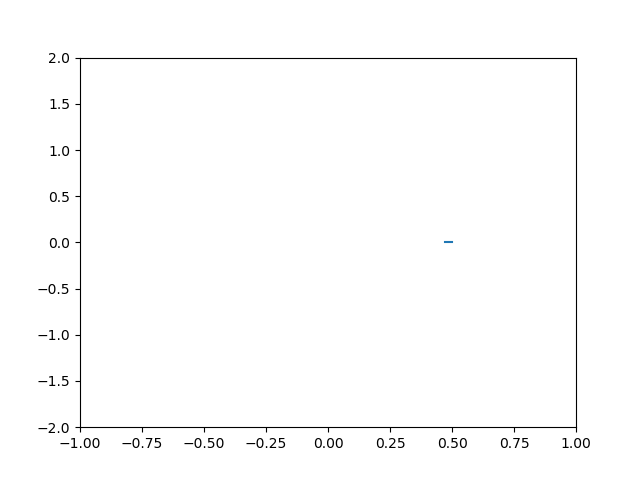

In [6]:
%matplotlib nbagg

fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-2, 2))
line1, = ax.plot([], [])
line2, = ax.plot([], [])
#line3, = ax.plot([], [])
#line4, = ax.plot([], [])
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    #line3.set_data([], [])
    #line4.set_data([], [])
    
def animate(i):
    x1 = ode_solver(masses, pos, vel, i, T, 'Euler')[:,0][:,0]
    x2 = ode_solver(masses, pos, vel, i, T, 'Euler')[:,1][:,0]
    #x3 = ode_solver(masses, pos, vel, i, T, 'Euler')[:,2][:,0]
    #x4 = ode_solver(masses, pos, vel, i, T, 'Euler')[:,3][:,0]
    y1 = ode_solver(masses, pos, vel, i, T, 'Euler')[:,0][:,1]
    y2 = ode_solver(masses, pos, vel, i, T, 'Euler')[:,1][:,1]
    #y3 = ode_solver(masses, pos, vel, i, T, 'Euler')[:,2][:,1]
    #y4 = ode_solver(masses, pos, vel, i, T, 'Euler')[:,3][:,1]
    line1.set_data(x1, y1)
    line2.set_data(x2, y2)
    #line3.set_data(x3, y3)
    #line4.set_data(x4, y4)
    
anim = FuncAnimation(fig, animate, init_func=init, frames=1000)

Podemos notar que la influencia del peso que tienen las masas se ve afectado en el movimiento de esta. Esto se debe a que las de menor masa pueden desplazarse mas rapido que una de mayor masa, pero hay que agregar que las de mayor masa si bien pueden ser mas lentas, estas ejersen una mayor fuerza sobre el resto. Por esto ultimo es que al aumentar las masas se ven mayor "afectadas" entre ellas. Se puede observar que se van formando las curvas entre las masas, pero dependiendo de cada objeto es como este puede verse afectado con el resto al estar todos en movimiento.

4. Usando su código de la sección anterior, estudie el efecto del parámetro $\Delta t$. Para esto intente encontrar un $\Delta t$ de manera que sus soluciones con ambos métodos sean visualmente similares. Para esto puede usar los parámetros de la sección anterior. Concluya respecto a la estabilidad de la solución en función del parámetro $\Delta t$.

   Si consideramos lo que vimos en clases, el método de Runge-Kutta 4 trabaja con un espacio mayor en el plano, esto quiere decir que el area que considera es más amplia que en el caso del método de Euler. Con esto podemos decir que si Euler encuentra un $\Delta t$ que cumpla con la ecuacion, entonces tambien podra satisfacer la ecuacion en Runge-Kutta 4. Para el caso de de Euler, este genera la curva mas "recta" a la solución, mientras que RK4 lo que hace es seguir el "camino" a la solución.


## Sección 2: Backward Euler

El método de Backward Euler (o Euler Implícito) es similar al método clasico de Euler, pero en lugar de aproximar la integral con Riemman por la izquierda, la aproxima con una integral de Riemann por la derecha, es decir:
\begin{equation}
    \mathbf{y}_{i+1}=y_{i}+\Delta t\,\mathbf{f}(t_{i+1},\mathbf{y}_{i+1}),
\end{equation}
por lo que es necesario resolver un problema de búsqueda de ceros multidimensional en cada paso.

1. Implemente la función adjunta `ode_solver_2` para que permita resolver el problema *n-body* utilizando el método de Backward Euler.

Para implementar la funcion usaremos newton para la busqueda de ceros, asi podremos obtener los valores del siguiente $y_{n+1}$. Esto para cada iteracion, luego formamos el vector y.

In [ ]:
#No funciona para Backward Euler

def backeuler(y1,m,x1,f,h):
    f1= lambda y1,y2,t2: y1 - y2 + h*f(t2,y1)
    f2= lambda y1,t2: h*f(t2,y1)
    J = lambda x,y: np.array([[2*x, 2*y],[-2*x, 1]])
    
    Newton = lambda x,y: np.array([[x],[y]])-np.linalg.solve(J(x,y),np.array([[f1(x,y)],[f2(x,y)]]))
    NewtonR = Newton(x1,y1)
    t_2 = NewtonR[0]
    y_2 = NewtonR[1]
    y_2 = y_1 + h*f(t_2 , y_1)
    return y_2

def ode_solver_2(masses,pos, vel, N, T, mthd):
    n=len(masses)
    t = np.zeros((N,n,3))
    for i in range(n):
        t[0][i] = (pos[i])
    h=N/T
    res = vel
    for j in range(1,N):
        t[j] = backeuler(t[j-1],j,vel,funcR,h)
        res = backeuler(res,masses,t[j],funcion,h)
        for i in range(n):
            vel[i] = res[i]/masses[i]
    return t

Exp1 = ode_solver_2(masses, pos, vel, N, T, 'Back')
print(Exp1)

2. Use un widget para graficar sus resultados con los parámetros entregados en la sección anterior, esta vez solo modificando el valor de $\Delta t$ para los métodos de Euler, Backward Euler y Runge Kutta 4. Concluya como se modifican sus resultados.

In [ ]:

def ode_solver_2_interface(N, T, method):
    masses=np.array([1.1,1.9])
    pos=np.array([[0.5,0,0],[-0.5,0,0]])
    vel=np.array([[-0.05,0,0.01],[0.01,0.01,0]])
    y = ode_solver_2(masses, pos, vel, 2**N, T, method)
    # Your code and plots goes here!

interact_manual(ode_solver_2_interface,N=widgets.IntSlider(min=1, max=20),T=fixed(100),method=["Euler","RK4","BackEuler"])

## ---
# Instrucciones:

* **Importante, Asegúrese de responder TODO lo que la pregunta pide.**
* La estructura de la tarea es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Responder cada pregunta de forma personal.
     5. Referencias. Es muy importante incluir todas las fuentes usadas, de otra forma se considera que lo no se ha citado adecuadamente es su trabajo.
* La tarea debe ser realizada en `Jupyter Notebook` (`Python3`) entregado.
* Recuerde responder la encuesta en el plazo establecido
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `Matplotlib` y `ipywidgets`, entre otras, así como la **correcta implementación de algoritmos vectorizados**.
* **MUY IMPORTANTE** El archivo de entrega debe denominarse TareaN-rol.tar.gz y _notebook_ debe tener como nombre TareaN-rol.ipynb, donde $N$ es el número de la tarea y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados, nombre y rol del estudiante. Por cada error en este ambito implicará un descuento de 30 puntos.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* Debe citar toda fuente de código externo. 
* El trabajo es personal, no se permite compartir código ni utilizar código de otros, aunque sí se sugiere discutir aspectos generales con sus compañeros.
* En caso de sospecha de no cumplimiento de estas instrucciones, se solicitará al involucrado o la involucrada a aclarar la situación. Dependiendo de la justificación se decidirá su calificación, la cual podrá o no ser penalizada.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

---

# Referencias


[1] https://es.wikipedia.org/wiki/Alfa_Centauri

[2] Bonus_Newton_Rn JupyterNotebook CC1 

[3] U3_ODE JupyterNotebook del Curso 

[4] Análisis Numérico Timothy Sauer 